# Evaluate Models to Predict Fraud

This project trained several models and evaluated how effectively they predict instances of fraud. The raw data is stored in `fraud_data.csv`. Each row corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Question 1
What percentage of the observations in the dataset are instances of fraud?

In [6]:
def answer_one():    
    df = pd.read_csv('fraud_data.csv')    
    return len(df[df['Class'] == 1])/len(df)
answer_one()

NameError: name 'df' is not defined

In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


### Question 2

Train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

In [8]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score 
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)    
    return accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions)
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

In [10]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    svc = SVC(gamma = 'auto').fit(X_train, y_train)
    y_predict = svc.predict(X_test)    
    return accuracy_score(y_test, y_predict), recall_score(y_test, y_predict), precision_score(y_test, y_predict)
answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function?

In [13]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svc = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
    y = svc.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, y)    
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier. Create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).
What is the recall when the precision is `0.75`? What is the true positive rate when the false positive rate is `0.16`?

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
#y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)

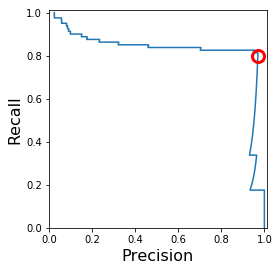

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.gca().set_aspect('equal')
plt.show()

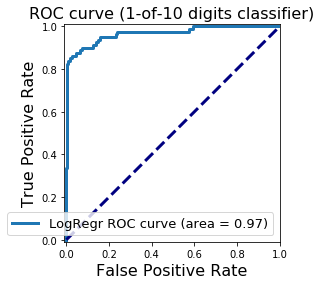

In [39]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [46]:
def answer_five():
    rec = float(recall[np.where(precision == 0.75)])
    pos = float(tpr_lr[np.where((fpr_lr > 0.159) & (fpr_lr < 0.161))][0])
    return rec, pos
answer_five()

(0.825, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

In [55]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    lr = LogisticRegression(solver='liblinear')
    grid_lr_rec = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall', cv =3, return_train_score = True)
    grid_lr_rec.fit(X_train, y_train)        
    return grid_lr_rec.cv_results_['mean_test_score']
answer_six()

array([0.66666667, 0.76086957, 0.80072464, 0.80434783, 0.8115942 ,
       0.8115942 , 0.80797101, 0.8115942 , 0.80797101, 0.80797101])

<IPython.core.display.Javascript object>


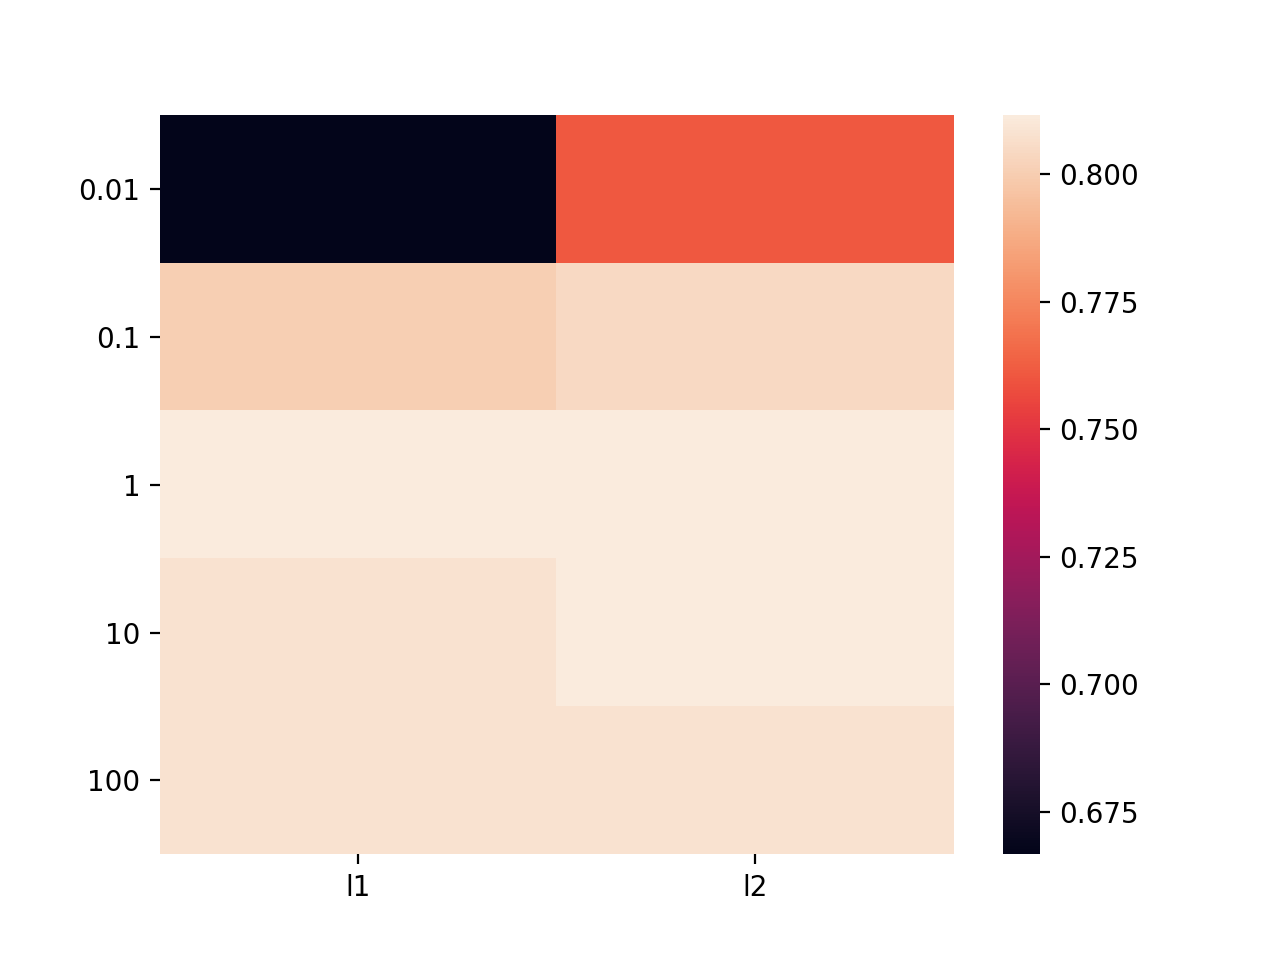

In [56]:
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);
GridSearch_Heatmap(answer_six())